In [7]:
!pip install opencv-python
!pip install opencv-python-headless

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
pip install -U scikit-image

Requirement already up-to-date: scikit-image in /usr/local/lib/python3.6/dist-packages (0.17.2)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import scipy

In [10]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 as mobilenetv2
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras import layers, Sequential
from matplotlib import pyplot
from math import floor
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from numpy import expand_dims, array, exp, max
import json
import skimage.feature as feature
from skimage.io import imread
from skimage.color import rgb2gray

from skimage.transform import resize

In [11]:
model1 = mobilenetv2()
model2 = Model(inputs=model1.inputs, outputs=model1.layers[1].output)
# model.add(layers.MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'))
model = Sequential(layers=model2.layers)
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
# model = Model(inputs=model.inputs, outputs = model.layers[1].output)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
Total params: 864
Trainable params: 864
Non-trainable params: 0
_________________________________________________________________


In [12]:
class LocalBinaryPatterns:
  def __init__(self, numPoints, radius):
    self.numPoints = numPoints
    self.radius = radius

  def describe(self, image, eps = 1e-7):
    lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, self.numPoints+3), range=(0, self.numPoints + 2))

    # Normalize the histogram
    hist = hist.astype('float')
    hist /= (hist.sum() + eps)

    return hist, lbp

In [40]:
###########################THIS CODE CHECKS IMAGES FROM A FOLDER#################################

def sortTrainImages():
    # get the class labels from training datasets
    p = {}
    data_path = '../../StanfordDogs/Stanford_Dogs'
    img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255, rotation_range=20)
    #labels = img_gen.flow_from_directory(data_path + '/Images')
    #train_labels = labels.class_indices.keys()

    #for lbl in train_labels:
    resnet_path = data_path +'/Images/' + 'n02113712-miniature_poodle'
    p_files = [f for f in listdir(resnet_path) if isfile(join(resnet_path, f))]
    pests_images = np.empty(len(p_files), dtype=object)
    print(p_files)
    for m in range(0, len(p_files)):
        
            #print(join(resnet_path, p_files[m]))
        imageName_x = p_files[m]
        p.update({'n02113712-miniature_poodle' + "_" + str(m): imageName_x})
            ######if m < 25:
                #pests_images[m] = cv2.imread(join(resnet_path, p_files[m]))
                # get the name of the image
                ######imageName_x = p_files[m]
                #####p.update({lbl + "_" + str(m): imageName_x})

    return p


images_collection = sortTrainImages()

['n02113712_3117.jpg', 'n02113712_3171.jpg', 'n02113712_48.jpg', 'n02113712_2632.jpg', 'n02113712_212.jpg', 'n02113712_2274.jpg', 'n02113712_2150.jpg', 'n02113712_9159.jpg', 'n02113712_3157.jpg', 'n02113712_3272.jpg', 'n02113712_335.jpg', 'n02113712_2405.jpg', 'n02113712_1897.jpg', 'n02113712_8708.jpg', 'n02113712_2136.jpg', 'n02113712_1272.jpg', 'n02113712_109.jpg', 'n02113712_743.jpg', 'n02113712_3790.jpg', 'n02113712_2699.jpg', 'n02113712_1448.jpg', 'n02113712_885.jpg', 'n02113712_628.jpg', 'n02113712_421.jpg', 'n02113712_3196.jpg', 'n02113712_3147.jpg', 'n02113712_2585.jpg', 'n02113712_1554.jpg', 'n02113712_3289.jpg', 'n02113712_3312.jpg', 'n02113712_112.jpg', 'n02113712_1558.jpg', 'n02113712_5210.jpg', 'n02113712_237.jpg', 'n02113712_459.jpg', 'n02113712_574.jpg', 'n02113712_3327.jpg', 'n02113712_2746.jpg', 'n02113712_2107.jpg', 'n02113712_9682.jpg', 'n02113712_438.jpg', 'n02113712_291.jpg', 'n02113712_9629.jpg', 'n02113712_6697.jpg', 'n02113712_7666.jpg', 'n02113712_8595.jpg', 'n

In [41]:
def softMax(temperature, features_list):
    feat_list = [x / temperature for x in features_list]
    feature_list = exp(feat_list - max(feat_list))
    return feature_list / feature_list.sum(axis=0)

n02113712-miniature_poodle_0
n02113712-miniature_poodle_1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


n02113712-miniature_poodle_2
n02113712-miniature_poodle_3
n02113712-miniature_poodle_4
n02113712-miniature_poodle_5
n02113712-miniature_poodle_6
n02113712-miniature_poodle_7
n02113712-miniature_poodle_8
n02113712-miniature_poodle_9
n02113712-miniature_poodle_10
n02113712-miniature_poodle_11
n02113712-miniature_poodle_12
n02113712-miniature_poodle_13
n02113712-miniature_poodle_14
n02113712-miniature_poodle_15
n02113712-miniature_poodle_16
n02113712-miniature_poodle_17
n02113712-miniature_poodle_18
n02113712-miniature_poodle_19
n02113712-miniature_poodle_20
n02113712-miniature_poodle_21
n02113712-miniature_poodle_22
n02113712-miniature_poodle_23
n02113712-miniature_poodle_24
n02113712-miniature_poodle_25
n02113712-miniature_poodle_26
n02113712-miniature_poodle_27
n02113712-miniature_poodle_28
n02113712-miniature_poodle_29
n02113712-miniature_poodle_30
n02113712-miniature_poodle_31
n02113712-miniature_poodle_32
n02113712-miniature_poodle_33
n02113712-miniature_poodle_34
n02113712-miniatur

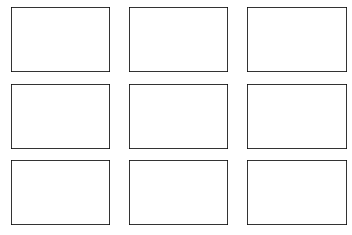

In [42]:
features_prob_dist_array = []

for o, j in images_collection.items():
    print(o)
    contrast_features_array = []
    homogeneity_features_array = []
    dissimilarity_features_array = []
    energy_features_array = []
    correlation_features_array = []
    
    image_string = '../../StanfordDogs/Stanford_Dogs/Images/n02113712-miniature_poodle/' + j
  
    img = imread(image_string)
    img = resize(img,(224,224,3))
        # get the path of image to extract the class
    img_class =j[0]
    img = img_to_array(img)    
    # expand the image dimensions
    img = expand_dims(img, axis=0)
        # scale the pixels
    img = preprocess_input(img)
        # get the features of the first layer
    feature_maps = model.predict(img)
    
    correlation_numerator = []
    energy_numerator = []
    homogeneity_numerator = []
    dissimilarity_numerator = []
    contrast_numerator = []
    
    ix = 1
    square = 3

    for _ in range(square):
        for _ in range(square):
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            ##################FLATTEN THE FEATURE for dimensionality reduction##################################
            feature_items = array(feature_maps[0, :, :, ix - 1])
            #get the unsigned values of the feature
            features_x = feature_items.astype(np.uint8)        
            #get the grey-level cooccurrence matrix
            graycom = feature.greycomatrix(features_x, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)            
            # Find the GLCM properties
            correlation = feature.greycoprops(graycom, 'correlation') 
            contrast = feature.greycoprops(graycom, 'contrast')
            dissimilarity = feature.greycoprops(graycom, 'dissimilarity')
            homogeneity = feature.greycoprops(graycom, 'homogeneity')
            energy = feature.greycoprops(graycom, 'energy')
            correlation = feature.greycoprops(graycom, 'correlation') 
            
            #get the probability distribution using correlation harrick features except correlation
            contrast_prob = softMax(0.5,contrast[0])
            dissimilarity_prob = softMax(0.5,dissimilarity[0])
            homogeneity_prob = softMax(0.5,homogeneity[0])
            energy_prob = softMax(0.5,energy[0])
            correlation_prob = softMax(0.5,correlation[0])
            
            #get the conflated distribution for this feature
            conf_numerator_contrast = np.prod(contrast_prob)
            conf_numerator_dissimilarity = np.prod(correlation_prob)
            conf_numerator_homogeneity = np.prod(homogeneity_prob)
            conf_numerator_energy = np.prod(energy_prob)
            conf_numerator_correlation = np.prod(correlation_prob)
            
            contrast_numerator.append(conf_numerator_contrast)
            energy_numerator.append(conf_numerator_energy)
            dissimilarity_numerator.append(conf_numerator_dissimilarity)
            homogeneity_numerator.append(conf_numerator_homogeneity)
            correlation_numerator.append(conf_numerator_correlation)
            
            #image_features_array.append(correlation_prob)
            contrast_features_array.append(contrast_numerator)
            homogeneity_features_array.append(homogeneity_numerator)
            dissimilarity_features_array.append(dissimilarity_numerator)
            energy_features_array.append(energy_numerator)
            correlation_features_array.append(correlation_numerator)
            #pyplot.imshow(feature_maps[0, :, :, ix - 1], cmap='gray')
            
            ix += 1
    correlation_denominator = np.trapz(correlation_numerator,axis=0)
    contrast_denominator = np.trapz(contrast_numerator,axis=0)
    homogeneity_denominator = np.trapz(homogeneity_numerator,axis=0)
    dissimilarity_denominator = np.trapz(dissimilarity_numerator,axis=0)
    energy_denominator = np.trapz(energy_numerator,axis=0)
    
    #conflated distribution for the image becomes
    conflated_dist_correlation = correlation_numerator/correlation_denominator
    conflated_dist_contrast = contrast_numerator/contrast_denominator
    conflated_dist_homogeneity = homogeneity_numerator/homogeneity_denominator
    conflated_dist_dissimilarity = dissimilarity_numerator/dissimilarity_denominator
    conflated_dist_energy = energy_numerator/energy_denominator
    
    new_rec_corr = {j + "_/" +'n02113712-miniature_poodle': conflated_dist_correlation.tolist()}
    new_rec_cont = {j + "_/" +'n02113712-miniature_poodle': conflated_dist_contrast.tolist()}
    new_rec_homo = {j + "_/" +'n02113712-miniature_poodle': conflated_dist_homogeneity.tolist()}
    new_rec_diss = {j + "_/" +'n02113712-miniature_poodle': conflated_dist_dissimilarity.tolist()}
    new_rec_ener = {j + "_/" +'n02113712-miniature_poodle': conflated_dist_energy.tolist()}
        
    with open("../../files/mobilenetv2/glcm/stanford/stanford_domain_data_new_correlation_glcm.json", 'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["target_images"].append(new_rec_corr)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent=4)
    
    with open("../../files/mobilenetv2/glcm/stanford/stanford_domain_data_new_contrast_glcm.json", 'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["target_images"].append(new_rec_cont)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent=4)
    
    with open("../../files/mobilenetv2/glcm/stanford/stanford_domain_data_new_homogeneity_glcm.json", 'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["target_images"].append(new_rec_homo)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent=4)
        
    with open("../../files/mobilenetv2/glcm/stanford/stanford_domain_data_new_dissimilarity_glcm.json", 'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["target_images"].append(new_rec_diss)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent=4)
        
    with open("../../files/mobilenetv2/glcm/stanford/stanford_domain_data_new_energy_glcm.json", 'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["target_images"].append(new_rec_ener)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent=4)

    ##if they need to be saved in a bigger file
    #features_prob_dist_array.append(conflated_dist)